## Web Scraping Rotten Tomatoes

This project scraps data from rotten tomatoes by downloading, gathering, and organizing data using BeautifulSoup library.

In [11]:
import pandas as pd
import requests
import os
import glob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#Reading data
#This dataset is the cleaned end-product
df_clean = pd.read_csv('bestofrt.tsv', delimiter='\t')
df_clean.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


### Scraping: Download Files

In [13]:
ebert_movies = []
with open('MoviesList.csv', 'r') as f:
    for line in f:
        ebert_movies.append(line[1:-3])

In [14]:
# Gather data
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for ebert_url in ebert_movies:
    response = requests.get(ebert_url)
    with open(os.path.join(folder_name, ebert_url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [15]:
# Parse data into dictionary using BeautifulSoup
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_='meter-value').find('span').contents[0][:-1]
        critic_score = soup.find('div', class_='critic-score').find('a').contents[3].contents[0].contents[0]
        num_critic_ratings = soup.find(id='scoreStats').find_all()[4].contents[0]
        num_audience_ratings = soup.find('div', class_='audience-info').find_all('div')[1].contents[2].strip().replace(',','')        
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings),
                        'critic_score': int(critic_score),
                        'num_critic_ratings': int(num_critic_ratings)
                       })
        
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings', 'critic_score', 'num_critic_ratings'])

In [16]:
# Look at results
df.head()

,title,audience_score,number_of_audience_ratings,critic_score,num_critic_ratings
0,Zootopia (2016),92,98633,98,249
1,The Treasure of the Sierra Madre (1948),93,25627,100,45
2,All Quiet on the Western Front (1930),89,17768,100,40
3,Rear Window (1954),95,149458,100,63
4,Selma (2015),86,60533,99,237


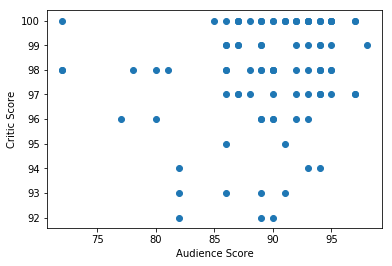

In [17]:
# Scatterplot of audience vs critic scroes
plt.scatter(df['audience_score'], df['critic_score']);
plt.xlabel('Audience Score');
plt.ylabel('Critic Score');

In [18]:
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        df_list.append( {
            'title' : file.readline()[0:-1],
            'url' : file.readline()[0:-1],
            'review' : file.read()
        })
df = pd.DataFrame(df_list, columns = ['title', 'url', 'review'])
df.head()

,title,url,review
0,Dunkirk (2017),http://www.rogerebert.com/reviews/dunkirk-2017,"Lean and ambitious, unsentimental and bombasti..."
1,Army of Shadows (L'Armée des ombres) (1969),http://www.rogerebert.com/reviews/great-movie-...,"Jean-Pierre Melville's ""Army of Shadows"" is ab..."
2,Alien (1979),http://www.rogerebert.com/reviews/great-movie-...,"At its most fundamental level, ""Alien"" is a mo..."
3,The Bride of Frankenstein (1935),http://www.rogerebert.com/reviews/great-movie-...,To a new world of gods and monsters.\n\nSo int...
4,The 400 Blows (Les Quatre cents coups) (1959),http://www.rogerebert.com/reviews/great-movie-...,I demand that a film express either the joy of...


In [19]:
#Using wptools API
import wptools

In [20]:
et_page = wptools.page('E.T._the_Extra-Terrestrial').get();

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) Q787098|Q30|Q676094|Q787145|P3933|Q65|Q...
www.wikidata.org (labels) P2509|P364|P2334|Q7341915|P214|P3203|P3...
www.wikidata.org (labels) Q823422|Q377616|Q130232|P2529|Q20644795...
www.wikidata.org (labels) Q22006653|P272|P1265|Q488651|P495|P58|P...
en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:E t the extra terrestrial ver3....
E.T. the Extra-Terrestrial (en) data
{
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(80)> P1562, P57, P272, P345, P31, P161, P373, P480...
  description: 1982 American scien

In [22]:
#extract infobox
et_page.data['infobox']

#extract image
et_page.data['image'][0]

#extract director
et_page.data['infobox']['director']

'[[Steven Spielberg]]'

In [44]:
movie_titles = []
with open('MovieTitles.csv', 'r') as f:
    for line in f:
        movie_titles.append(line[2:-3])

In [52]:
from PIL import Image
from io import BytesIO

In [ ]:
#directory for movie cloud posters
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [65]:
folder_name

'ebert_reviews'

In [79]:
#download movie posters for each movie
df_images = []
posters_folder = 'bestofrt_posters/'
for movie in movie_titles:
    try:
        page = wptools.page(movie).get();
        image_url = page.data['image'][0]['url']
        r = requests.get(image_url)

        # Download movie poster image
        i = Image.open(BytesIO(r.content))
        image_file_format = image_url.split('.')[-1]
        index = movie_titles.index(movie) + 1
        i.save(posters_folder + str(index) + '_' + movie + '.' + image_file_format)
    
        # Add to
        df_images.append({'ranking' : index, 'movie' : movie, 'url' : image_url})
    
    except Exception:
        print('Error looking for ' + movie)

en.wikipedia.org (query) The_Wizard_of_Oz_(1939_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 561315
www.wikidata.org (wikidata) Q193695
www.wikidata.org (labels) Q23830576|Q95111|Q157394|Q1097348|Q30|Q...
www.wikidata.org (labels) P1970|P3138|Q1273621|Q8850523|P1435|Q24...
www.wikidata.org (labels) P750|P345|Q3047424|Q642196|P344|P144|P1...
en.wikipedia.org (restbase) /page/summary/The_Wizard_of_Oz_(1939_film)
en.wikipedia.org (imageinfo) File:Wizard of oz movie poster.jpg|F...
The Wizard of Oz (1939 film) (en) data
{
  aliases: <list(1)> Wizard of Oz
  assessments: <dict(4)> United States, Film, Library of Congress, Oz
  claims: <dict(73)> P31, P345, P373, P57, P144, P480, P58, P162, ...
  description: 1939 movie based on the book by L. Frank Baum
  exhtml: <str(601)> <p><i><b>

en.wikipedia.org (query) Mad_Max:_Fury_Road
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 36426373
www.wikidata.org (wikidata) Q1757288
www.wikidata.org (labels) Q1097348|Q30|P2756|P915|Q393686|Q408|P1...
www.wikidata.org (labels) Q5562241|Q6389652|P1981|Q707158|Q289801...
www.wikidata.org (labels) Q4960985|P2061|P750|P345|P344|P2363|Q16...
en.wikipedia.org (restbase) /page/summary/Mad_Max:_Fury_Road
en.wikipedia.org (imageinfo) File:Mad Max Fury Road film Logo.png...
Mad Max: Fury Road (en) data
{
  aliases: <list(3)> Mad Max 4, Fury Road, Mad Max Fury Road
  assessments: <dict(3)> Australia, Film, Science Fiction
  claims: <dict(72)> P345, P31, P57, P58, P344, P495, P646, P136, ...
  description: 2015 Australian post-apocalyptic action film
  exhtml: <str(824)> <p><i><b>Mad Max: Fury

en.wikipedia.org (query) The_Godfather
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 2466773
www.wikidata.org (wikidata) Q47703
www.wikidata.org (labels) P175|Q30|P3933|Q65|Q959790|Q29585307|P9...
www.wikidata.org (labels) P3804|Q752652|P3417|Q102642|Q7444356|P1...
www.wikidata.org (labels) P2529|Q1826885|Q171736|P373|Q193628|Q16...
www.wikidata.org (labels) P856|Q214665|P2142|P3844|P462|Q214066|P...
en.wikipedia.org (restbase) /page/summary/The_Godfather
en.wikipedia.org (imageinfo) File:Godfather ver1.jpg|File:The God...
The Godfather (en) data
{
  aliases: <list(1)> Godfather
  assessments: <dict(6)> United States, New York City, Film, Libra...
  claims: <dict(91)> P364, P345, P179, P31, P57, P58, P161, P144, ...
  description: 1972 US film directed by Francis Ford Coppola
  exhtml:

en.wikipedia.org (query) It_Happened_One_Night
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 44696
www.wikidata.org (wikidata) Q208632
www.wikidata.org (labels) Q30|P3933|Q3141567|P2631|P3141|Q1280760...
www.wikidata.org (labels) Q438865|P577|Q45171911|Q16003774|Q20644...
www.wikidata.org (labels) P3302|Q203819|P3844|P4665|Q186941|P462|...
en.wikipedia.org (restbase) /page/summary/It_Happened_One_Night
en.wikipedia.org (imageinfo) File:Claudette Colbert in It Happene...
It Happened One Night (en) data
{
  assessments: <dict(5)> United States, Film, Comedy, Romance, Lib...
  claims: <dict(71)> P31, P86, P57, P162, P161, P344, P345, P373, ...
  description: 1934 film by Frank Capra
  exhtml: <str(603)> <p><i><b>It Happened One Night</b></i> is a 1...
  exrest: <str(572)> It Happened One 

en.wikipedia.org (query) Moonlight_(2016_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 48320630
www.wikidata.org (wikidata) Q21527875
www.wikidata.org (labels) Q28492224|Q30|P3933|P2756|P915|P2631|P3...
www.wikidata.org (labels) Q28980118|Q586356|Q15429514|P577|P2636|...
www.wikidata.org (labels) Q27442165|P1657|Q723830|Q28951021|P480|...
en.wikipedia.org (restbase) /page/summary/Moonlight_(2016_film)
en.wikipedia.org (imageinfo) File:Moonlight (2016 film).png
Moonlight (2016 film) (en) data
{
  assessments: <dict(5)> United States, LGBT studies, Film, Africa...
  claims: <dict(81)> P31, P364, P345, P1476, P577, P57, P161, P495...
  description: 2016 film by Barry Jenkins
  exhtml: <str(350)> <p><i><b>Moonlight</b></i> is a 2016 American...
  exrest: <str(322)> Moonlight is a 201

en.wikipedia.org (query) Snow_White_and_the_Seven_Dwarfs_(1937_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 76361
www.wikidata.org (wikidata) Q134430
www.wikidata.org (labels) Q3306605|Q23830576|Q2437296|P571|Q15739...
www.wikidata.org (labels) P793|P214|P31|P3107|P4483|P4786|Q349650...
www.wikidata.org (labels) Q715807|Q851824|Q280187|Q267282|Q337876...
www.wikidata.org (labels) Q27148555|Q22752811|P750|P345|P344|Q347...
www.wikidata.org (labels) Q3046385|Q20822236|Q1860|Q3303696
en.wikipedia.org (restbase) /page/summary/Snow_White_and_the_Seve...
en.wikipedia.org (imageinfo) File:Snow white 1937 trailer screens...
Snow White and the Seven Dwarfs (1937 film) (en) data
{
  aliases: <list(1)> Snow White and the 7 Dwarfs
  assessments: <dict(5)> United States, Film, Animation, Lib

Error looking for A_Hard_Day%27s_Night_(film)


API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 62097
www.wikidata.org (wikidata) Q470336
www.wikidata.org (labels) P3933|P2631|Q7386084|P3141|P1476|Q26385...
www.wikidata.org (labels) Q130232|P2529|Q1444045|P373|P2346|P2465...
en.wikipedia.org (restbase) /page/summary/La_Grande_Illusion
en.wikipedia.org (imageinfo) File:GrandeIllusion.jpg|File:Grand-I...
La Grande Illusion (en) data
{
  aliases: <list(1)> Grande Illusion
  assessments: <dict(4)> Military history, Film, France, Anti-war
  claims: <dict(61)> P57, P31, P58, P161, P344, P345, P364, P921, ...
  description: 1937 French war film directed by Jean Renoir
  exhtml: <str(588)> <p><i><b>La Grande Illusion</b></i> is a 1937...
  exrest: <str(560)> La Grande Illusion is a 1937 French war film ...
  extext: <str(925)> _**La Grande Il

en.wikipedia.org (query) The_Maltese_Falcon_(1941_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 4593958
www.wikidata.org (wikidata) Q221462
www.wikidata.org (labels) Q30|P3933|Q1065207|Q959790|P915|P2631|P...
www.wikidata.org (labels) P2638|P2704|P161|P3145|P57|Q6130501|P13...
www.wikidata.org (labels) P462|P1562|P1804|Q45172088|P4276|Q20644...
en.wikipedia.org (restbase) /page/summary/The_Maltese_Falcon_(194...
en.wikipedia.org (imageinfo) File:Falconm.JPG|File:MainTitleMaltF...
The Maltese Falcon (1941 film) (en) data
{
  aliases: <list(1)> Maltese Falcon
  assessments: <dict(4)> United States, California, Film, Library ...
  claims: <dict(76)> P345, P31, P373, P57, P161, P144, P364, P480,...
  description: 1941 film by John Huston
  exhtml: <str(581)> <p><i><b>The Maltese Falc

en.wikipedia.org (query) Sunset_Boulevard_(film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 76368
www.wikidata.org (wikidata) Q193570
www.wikidata.org (labels) Q3082744|Q526861|Q30|P3933|Q65|Q2199513...
www.wikidata.org (labels) Q213611|P138|Q72267|P577|Q443121|P2638|...
www.wikidata.org (labels) Q1273140|P2515|P1411|P3135|P480|P2554|P...
en.wikipedia.org (restbase) /page/summary/Sunset_Boulevard_(film)
en.wikipedia.org (imageinfo) File:Sunset Boulevard 23.jpg|File:Su...
Sunset Boulevard (film) (en) data
{
  aliases: <list(1)> Sunset Blvd.
  assessments: <dict(5)> United States, California, Film, Library ...
  claims: <dict(69)> P138, P345, P31, P57, P161, P373, P480, P364,...
  description: 1950 film by Billy Wilder
  exhtml: <str(253)> <p><i><b>Sunset Boulevard</b></i> is a 1950 A

en.wikipedia.org (query) Rashomon
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 187603
www.wikidata.org (wikidata) Q135465
www.wikidata.org (labels) P3933|Q959790|P915|P1237|Q186326|P1476|...
www.wikidata.org (labels) Q40070|Q17|Q130232|P2529|P373|P2346|P24...
en.wikipedia.org (restbase) /page/summary/Rashomon
en.wikipedia.org (imageinfo) File:Rashomon poster 2.jpg|File:Rash...
Rashomon (en) data
{
  aliases: <list(1)> Rashōmon
  assessments: <dict(2)> Film, Japan
  claims: <dict(61)> P31, P57, P373, P345, P364, P58, P480, P272, ...
  description: 1950 film by Akira Kurosawa
  exhtml: <str(490)> <p><i><b>Rashomon</b></i><span style="font-we...
  exrest: <str(408)> Rashomon  is a 1950 Japanese period film dire...
  extext: <str(868)> _**Rashomon**_ (羅生門, _Rashōmon_ ) is a 1950 J...
  ex

en.wikipedia.org (query) Toy_Story_3
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 1213838
www.wikidata.org (wikidata) Q187278
www.wikidata.org (labels) Q30|P2631|P3141|P1237|P1476|P1552|Q1024...
www.wikidata.org (labels) P154|P136|Q107258|P1712|Q23830577|Q3814...
www.wikidata.org (labels) P4021|P495|P58|P4947|Q1860
en.wikipedia.org (restbase) /page/summary/Toy_Story_3
en.wikipedia.org (imageinfo) File:Toy Story 3 poster.jpg
Toy Story 3 (en) data
{
  assessments: <dict(4)> Film, Animation, Guild of Copy Editors, Disney
  claims: <dict(67)> P345, P31, P57, P58, P373, P480, P162, P272, ...
  description: 2010 American animated film
  exhtml: <str(1119)> <p><i><b>Toy Story 3</b></i> is a 2010 Ameri...
  exrest: <str(1077)> Toy Story 3 is a 2010 American 3D computer-a...
  extext: <str(237

en.wikipedia.org (query) Bride_of_Frankenstein
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 73375
www.wikidata.org (wikidata) Q875904
www.wikidata.org (labels) Q30|P3933|Q168383|Q467968|P2631|P3141|Q...
www.wikidata.org (labels) P57|Q3517461|P136|P2130|P1712|Q940662|P...
www.wikidata.org (labels) Q1860
en.wikipedia.org (restbase) /page/summary/Bride_of_Frankenstein
en.wikipedia.org (imageinfo) File:Brideoffrankposter.jpg|File:Bri...
Bride of Frankenstein (en) data
{
  aliases: <list(1)> The Bride of Frankenstein
  assessments: <dict(6)> United States, LGBT studies, Film, Scienc...
  claims: <dict(66)> P345, P373, P364, P31, P57, P480, P58, P162, ...
  description: 1935 American science-fiction horror film by James Whale
  exhtml: <str(636)> <p><i><b>Bride of Frankenstein</b></i> is a 

en.wikipedia.org (query) The_Philadelphia_Story_(film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 62592
www.wikidata.org (wikidata) Q498822
www.wikidata.org (labels) Q30|P3933|Q56016|Q179200|P915|P2631|P31...
www.wikidata.org (labels) Q45171911|P2638|Q1997730|P2704|P268|P16...
www.wikidata.org (labels) Q1366554|P3302|P840|Q3181785|P3844|Q295...
en.wikipedia.org (restbase) /page/summary/The_Philadelphia_Story_(film)
en.wikipedia.org (imageinfo) File:Philadelphia Story 20.jpg|File:...
The Philadelphia Story (film) (en) data
{
  aliases: <list(1)> Philadelphia Story
  assessments: <dict(4)> United States, Film, Philadelphia, Librar...
  claims: <dict(75)> P57, P162, P161, P344, P345, P373, P31, P58, ...
  description: 1940 film by George Cukor
  exhtml: <str(618)> <p><i><b>The Philadel

en.wikipedia.org (query) The_Treasure_of_the_Sierra_Madre_(film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 11088642
www.wikidata.org (wikidata) Q251559
www.wikidata.org (labels) Q30|P3933|P2631|P3141|P1476|Q1357250|P1...
www.wikidata.org (labels) Q1064827|Q1700525|P57|P136|Q107258|Q229...
www.wikidata.org (labels) P495|P58|P3212|Q162621|P935
en.wikipedia.org (restbase) /page/summary/The_Treasure_of_the_Sie...
en.wikipedia.org (imageinfo) File:Treasuremadre.jpg
The Treasure of the Sierra Madre (film) (en) data
{
  aliases: <list(1)> Treasure of the Sierra Madre
  assessments: <dict(5)> United States, Mexico, Film, Library of C...
  claims: <dict(70)> P345, P373, P31, P57, P161, P144, P364, P480,...
  description: 1948 American film
  exhtml: <str(362)> <p><i><b>The Treasure of the S

Error looking for 12_Angry_Men_(1957_film)


en.wikipedia.org (query) The_400_Blows
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 202140
www.wikidata.org (wikidata) Q162331
www.wikidata.org (labels) Q3102707|P915|Q3085470|P3141|P3219|Q90|...
www.wikidata.org (labels) P1981|Q3171407|P577|Q918681|P2638|P2704...
www.wikidata.org (labels) P1804|P3961|Q45172088|Q264194|P4276|Q53...
en.wikipedia.org (restbase) /page/summary/The_400_Blows
en.wikipedia.org (imageinfo) File:Quatre coups2.jpg
The 400 Blows (en) data
{
  aliases: <list(2)> 400 Blows, Les Quatre Cents Coups
  assessments: <dict(2)> Film, France
  claims: <dict(68)> P31, P57, P161, P58, P272, P179, P345, P364, ...
  description: 1959 film by François Truffaut
  exhtml: <str(628)> <p><i><b>The 400 Blows</b></i> is a 1959 Fren...
  exrest: <str(607)> The 400 Blows is a 1959 Fre

Error looking for Logan_(film)


API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 4592959
www.wikidata.org (wikidata) Q272599
www.wikidata.org (labels) Q361|Q30|Q357363|Q168383|P2631|P3141|P1...
www.wikidata.org (labels) P2638|Q1484304|Q2294197|P2704|P161|Q206...
www.wikidata.org (labels) P3995|P1411|P3135|Q47293|P480|P2554|Q43...
en.wikipedia.org (restbase) /page/summary/All_Quiet_on_the_Wester...
en.wikipedia.org (imageinfo) File:All Quiet on the Western Front ...
All Quiet on the Western Front (1930 film) (en) data
{
  aliases: <list(1)> À l'Ouest, rien de nouveau
  assessments: <dict(5)> Military history, United States, Film, Ge...
  claims: <dict(69)> P345, P364, P57, P161, P162, P344, P58, P373,...
  description: 1930 American epic war film
  exhtml: <str(257)> <p><i><b>All Quiet on the Western Front</b></...
  exr

en.wikipedia.org (query) A_Streetcar_Named_Desire_(1951_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 3367826
www.wikidata.org (wikidata) Q212129
www.wikidata.org (labels) Q30|P3933|P915|Q21995139|P2631|P3141|P1...
www.wikidata.org (labels) Q45171911|Q94992|P2638|P2704|P161|P3145...
www.wikidata.org (labels) Q944480|Q20644796|P905|Q72717|Q59824|P1...
en.wikipedia.org (restbase) /page/summary/A_Streetcar_Named_Desir...
en.wikipedia.org (imageinfo) File:A Streetcar Named Desire (1951)...
A Streetcar Named Desire (1951 film) (en) data
{
  aliases: <list(1)> Streetcar Named Desire
  assessments: <dict(3)> United States, Film, Library of Congress
  claims: <dict(73)> P1258, P373, P345, P31, P57, P58, P161, P144,...
  description: 1951 drama movie
  exhtml: <str(471)> <p><i><b>A Street

en.wikipedia.org (query) Dr._Strangelove
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 8695
www.wikidata.org (wikidata) Q105702
www.wikidata.org (labels) Q787065|Q30|P3933|Q139184|Q21213224|P91...
www.wikidata.org (labels) P1970|P3138|Q946859|P1981|Q145|Q1677002...
www.wikidata.org (labels) P2465|P4515|P646|Q51054366|Q7737|Q52806...
www.wikidata.org (labels) P1265|Q20644797|P1670|Q21213245|P495|P2...
en.wikipedia.org (restbase) /page/summary/Dr._Strangelove
en.wikipedia.org (imageinfo) File:Dr. Strangelove - Riding the Bo...
Dr. Strangelove (en) data
{
  aliases: <list(1)> Dr. Strangelove or: How I Learned to Stop Wor...
  assessments: <dict(7)> Military history, United States, Film, Co...
  claims: <dict(86)> P57, P162, P161, P344, P272, P345, P31, P58, ...
  description: 1964 UK sati

Error looking for Dr._Strangelove


en.wikipedia.org (query) Frankenstein_(1931_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 73488
www.wikidata.org (wikidata) Q546829
www.wikidata.org (labels) Q1361838|Q30|P3933|Q434901|Q168383|Q471...
www.wikidata.org (labels) P161|P3145|P57|Q70692|Q150827|P136|Q940...
www.wikidata.org (labels) P1265|Q20644797|P495|P58|P3212|Q1860
en.wikipedia.org (restbase) /page/summary/Frankenstein_(1931_film)
en.wikipedia.org (imageinfo) File:Poster - Frankenstein 02.jpg|Fi...
Frankenstein (1931 film) (en) data
{
  assessments: <dict(5)> United States, Film, Science Fiction, Hor...
  claims: <dict(70)> P345, P31, P57, P161, P144, P480, P162, P344,...
  description: 1931 horror monster film directed by James Whale
  exhtml: <str(414)> <p><i><b>Frankenstein</b></i> is a 1931 Ameri...
  exrest: 

en.wikipedia.org (query) The_Babadook
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 41716245
www.wikidata.org (wikidata) Q16011764
www.wikidata.org (labels) Q21571489|P3933|P3135|P1874|P480|P1970|...
www.wikidata.org (labels) P750|Q200092|P2334|P495|P345|P58|P3306|...
en.wikipedia.org (restbase) /page/summary/The_Babadook
en.wikipedia.org (imageinfo) File:The-Babadook-Poster.jpg
The Babadook (en) data
{
  aliases: <list(1)> Babadook
  assessments: <dict(4)> Australia, LGBT studies, Film, Horror
  claims: <dict(45)> P31, P577, P495, P161, P136, P345, P856, P57,...
  description: <str(88)> 2014 Australian-Canadian psychological ho...
  exhtml: <str(407)> <p><i><b>The Babadook</b></i> is a 2014 Austr...
  exrest: <str(379)> The Babadook is a 2014 Australian supernatura...
  extext: <str(7

Error looking for Rosemary%27s_Baby_(film)


API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 239587
www.wikidata.org (wikidata) Q132863
www.wikidata.org (labels) Q23830576|P175|Q1097348|Q30|Q2426173|P2...
www.wikidata.org (labels) Q15885268|Q127552|P57|Q464320|P154|P136...
www.wikidata.org (labels) Q135498|P905|Q22006653|P272|P1265|Q4886...
en.wikipedia.org (restbase) /page/summary/Finding_Nemo
en.wikipedia.org (imageinfo) File:Finding Nemo.jpg
Finding Nemo (en) data
{
  aliases: <list(1)> Nemo
  assessments: <dict(5)> Australia, Film, Animation, Guild of Copy...
  claims: <dict(68)> P31, P345, P57, P480, P58, P272, P373, P840, ...
  description: 2003 American computer-animated family film
  exhtml: <str(600)> <p><i><b>Finding Nemo</b></i> is a 2003 Ameri...
  exrest: <str(579)> Finding Nemo is a 2003 American computer-anim...
  ex

en.wikipedia.org (query) L.A._Confidential_(film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 142457
www.wikidata.org (wikidata) Q339876
www.wikidata.org (labels) Q466459|Q30|P3933|Q318487|Q65|Q959790|P...
www.wikidata.org (labels) P1981|Q23830578|P921|Q223745|P577|Q2421...
www.wikidata.org (labels) Q3507448|P3995|Q464744|P1411|P3135|P480...
en.wikipedia.org (restbase) /page/summary/L.A._Confidential_(film)
en.wikipedia.org (imageinfo) File:La confidential.jpg
L.A. Confidential (film) (en) data
{
  assessments: <dict(4)> United States, California, Film, Organize...
  claims: <dict(75)> P57, P31, P345, P58, P161, P144, P480, P364, ...
  description: 1997 film by Curtis Hanson
  exhtml: <str(528)> <p><i><b>L.A. Confidential</b></i> is a 1997 ...
  exrest: <str(493)> L.A. Confidential i

en.wikipedia.org (query) Rome,_Open_City
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 2012056
www.wikidata.org (wikidata) Q721146
www.wikidata.org (labels) P3933|Q543779|P915|P2631|Q220|P3141|Q53...
www.wikidata.org (labels) P161|P3145|Q55450|P57|Q1135802|Q3783499...
www.wikidata.org (labels) P4276|Q20644796|P905|P4277|P1265|P3306|...
en.wikipedia.org (restbase) /page/summary/Rome,_Open_City
en.wikipedia.org (imageinfo) File:Open City DVD.jpg|File:ROMA C~1.JPG
Rome, Open City (en) data
{
  aliases: <list(2)> Roma città aperta, Roma citta aperta
  assessments: <dict(2)> Military history, Film
  claims: <dict(72)> P345, P31, P364, P57, P161, P58, P344, P921, ...
  description: 1945 film by Roberto Rossellini
  exhtml: <str(533)> <p><i><b>Open City</b></i> or <i><b>Rome, Ope...
  exrest:

en.wikipedia.org (query) The_Jungle_Book_(2016_film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 43650667
www.wikidata.org (wikidata) Q16857406
www.wikidata.org (labels) Q157394|Q21285484|Q6768622|Q30|Q173158|...
www.wikidata.org (labels) Q45769590|P31|P1431|Q191224|Q17270160|Q...
www.wikidata.org (labels) Q34436|P941|P444|Q28021024|Q4457167|P38...
www.wikidata.org (labels) P166|P3995|P4282|Q23308562|Q837676|Q470...
www.wikidata.org (labels) P3306|P2703|P2755|P3212|Q189509
en.wikipedia.org (restbase) /page/summary/The_Jungle_Book_(2016_film)
en.wikipedia.org (imageinfo) File:The Jungle Book (2016).jpg
The Jungle Book (2016 film) (en) data
{
  aliases: <list(1)> Jungle Book
  assessments: <dict(2)> Film, Disney
  claims: <dict(99)> P345, P31, P577, P57, P1237, P1258, P856, P12...
  de

en.wikipedia.org (query) Apocalypse_Now
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 18951054
www.wikidata.org (wikidata) Q182692
www.wikidata.org (labels) Q30|P3933|Q9205|Q195871|P915|P2631|P314...
www.wikidata.org (labels) Q179808|P31|P3107|P4786|Q103360|P227|P2...
www.wikidata.org (labels) Q940271|P2465|P4515|P646|Q106291|Q28193...
www.wikidata.org (labels) Q20644797|Q219400|P495|Q176945|P58|P270...
en.wikipedia.org (restbase) /page/summary/Apocalypse_Now
en.wikipedia.org (imageinfo) File:Apocalypse Now poster.jpg|File:...
Apocalypse Now (en) data
{
  assessments: <dict(6)> Military history, United States, Film, Vi...
  claims: <dict(88)> P345, P364, P31, P373, P57, P480, P144, P58, ...
  description: 1979 American war film
  exhtml: <str(785)> <p><i><b>Apocalypse Now</b></i> is a 

API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 31941988
www.wikidata.org (wikidata) Q232009
www.wikidata.org (labels) Q318155|Q157394|Q1097348|Q30|Q10863062|...
www.wikidata.org (labels) P31|P3107|Q1401230|P4786|P2508|P3804|Q2...
www.wikidata.org (labels) Q105682|Q441923|Q1257444|Q203545|Q39401...
www.wikidata.org (labels) P856|P2142|P3844|Q530344|P462|Q234128|Q...
en.wikipedia.org (restbase) /page/summary/Harry_Potter_and_the_De...
en.wikipedia.org (imageinfo) File:Harry Potter and the Deathly Ha...
Harry Potter and the Deathly Hallows – Part 2 (en) data
{
  assessments: <dict(2)> Novels, Film
  claims: <dict(83)> P57, P31, P162, P58, P144, P272, P345, P373, ...
  description: 2011 UK-US fantasy film
  exhtml: <str(575)> <p><i><b>Harry Potter and the Deathly Hallows...
  exrest: <str(5

en.wikipedia.org (query) Jaws_(film)
API warning: {'extracts': {'warnings': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
en.wikipedia.org (parse) 74830
www.wikidata.org (wikidata) Q189505
www.wikidata.org (labels) Q7372|Q266942|Q30|P3933|Q369175|Q168383...
www.wikidata.org (labels) P577|Q45171911|P2638|Q1038375|P2704|P16...
www.wikidata.org (labels) P4783|Q313727|P2518|Q1691324|P3302|Q491...
en.wikipedia.org (restbase) /page/summary/Jaws_(film)
en.wikipedia.org (imageinfo) File:Jaws-logo.svg|File:JAWS Movie p...
Jaws (film) (en) data
{
  assessments: <dict(7)> United States, California, Wikipedia 1.0,...
  claims: <dict(85)> P31, P345, P57, P144, P373, P58, P480, P162, ...
  description: 1975 American horror film directed by Steven Spielberg
  exhtml: <str(790)> <p><i><b>Jaws</b></i> is a 1975 American thri...
  exrest: <str(769)> Jaws is a 1975 A

Error looking for Battleship_Potemk


In [57]:
#download images
df = pd.DataFrame(df_images, columns={'ranking', 'movie', 'image-url'})
df = df.sort_values('ranking').reset_index(drop=True)
df.head()

['https://commons.wikimedia.org/wiki/File:WIZARD_OF_OZ_ORIGINAL_POSTER_1939.jpg']